In [ ]:
import pandas as pd

# Define the years and file paths
years = range(2019, 2024)  # From 2020 to 2023
file_template = "DEVICE{}.txt"  # File pattern

# List to store DataFrames
df_list = []

# Read each file, add a 'year' column, and append to list
for year in years:
    file_path = file_template.format(year)
    try:
        df = pd.read_csv(file_path, delimiter="|", dtype=str, encoding="latin1", on_bad_lines="skip")
        df["year"] = year  # Add year column
        df_list.append(df)
        print(f"✅ {file_path} loaded successfully!")
    except Exception as e:
        print(f"❌ Error reading {file_path}:", e)

# Merge all DataFrames into one
if df_list:
    df_device_all = pd.concat(df_list, ignore_index=True)
    print("✅ All device data merged successfully!")
else:
    df_device_all = None
    print("❌ No files were loaded.")

# Display first few rows
df_device_all.head()

C:\Users\vivek\anaconda3\Lib\site-packages\pandas\core\arrays\masked.py:61: UserWarning: Pandas requires version '1.3.6' or newer of 'bottleneck' (version '1.3.5' currently installed).
  from pandas.core import (


✅ DEVICE2019.txt loaded successfully!
✅ DEVICE2020.txt loaded successfully!
✅ DEVICE2021.txt loaded successfully!
✅ DEVICE2022.txt loaded successfully!
✅ DEVICE2023.txt loaded successfully!
✅ All device data merged successfully!


,MDR_REPORT_KEY,DEVICE_EVENT_KEY,IMPLANT_FLAG,DATE_REMOVED_FLAG,DEVICE_SEQUENCE_NO,DATE_RECEIVED,BRAND_NAME,GENERIC_NAME,MANUFACTURER_D_NAME,MANUFACTURER_D_ADDRESS_1,...,OTHER_ID_NUMBER,DEVICE_AVAILABILITY,DATE_RETURNED_TO_MANUFACTURER,DEVICE_REPORT_PRODUCT_CODE,DEVICE_AGE_TEXT,DEVICE_EVALUATED_BY_MANUFACTUR,COMBINATION_PRODUCT_FLAG,UDI-DI,UDI-PUBLIC,year
0,7491296,NaN,NaN,NaN,1,2019/03/06,PARADIGM REAL-TIME INSULIN INFUSION PUMP MMT-7...,"PUMP, INFUSION, INSULIN, TO BE USED WITH INVAS...",MEDTRONIC PUERTO RICO OPERATIONS CO.,CEIBA NORTE IND. PARK #50 ROAD,...,NaN,R,2018/04/11,OYC,DA,R,N,00613994373083,(01)00613994373083,2019
1,7811695,NaN,NaN,NaN,1,2019/03/08,"MONOPOLAR ACTIVE CORD, BOVIE/VALLEYLAB GENERATORS",MONOPOLAR ACTIVE CORD,"GYRUS ACMI, INC",136 TURNPIKE ROAD,...,NaN,R,2019/02/07,FAS,DA,Y,N,NaN,NaN,2019
2,7987287,NaN,NaN,NaN,1,2019/07/18,PARADIGM REAL-TIME REVEL INSULIN INFUSION PUMP...,"PUMP, INFUSION, INSULIN, TO BE USED WITH INVAS...",MEDTRONIC PUERTO RICO OPERATIONS CO.,CEIBA NORTE IND. PARK #50 ROAD,...,NaN,R,2019/07/10,OYC,DA,R,N,00643169513891,(01)00643169513891,2019
3,8033177,NaN,NaN,NaN,1,2019/02/06,PROMAX¿ SERIES BARD® C-MAX¿ CUTTING LOOP,CUTTING LOOP,"C.R. BARD, INC. (COVINGTON) -1018233",8195 INDUSTRIAL BLVD,...,NaN,N,NaN,FAS,DA,R,N,00801741018572,(01)00801741018572,2019
4,8155636,NaN,NaN,NaN,1,2019/01/03,ENDO ANCHOR SYSTEM - HELI-FX AAA,ENDOVASCULAR SUTURING SYSTEM,MEDTRONIC IRELAND,PARKMORE BUSINESS PARK WEST,...,NaN,N,NaN,OTD,DA,*,N,NaN,NaN,2019


In [ ]:
defib_df=df_device_all[df_device_all['GENERIC_NAME'].str.contains('defibrillator',case=False,na=False)]


In [ ]:
print(defib_df["GENERIC_NAME"].unique())

['IMPLANTABLE CARDIOVERTER DEFIBRILLATOR'
 'DEFIBRILLATOR, AUTOMATIC IMPLANTABLE CARDIOVERTER, WITH CARDIAC RESYNCHRONIZATIO'
 'DEFIBRILLATOR, IMPLANTABLE, DUAL-CHAMBER'
 'DEFIBRILLATOR, AUTOMATIC IMPLANTABLE CARDIOVERTER'
 'DEFIBRILLATOR/PACEMAKER' 'ALS DEFIBRILLATOR MONITOR'
 'AUTOMATED EXTERNAL DEFIBRILLATORS (NON-WEARABLE)' 'DEFIBRILLATOR'
 'XL+ DEFIBRILLATOR' 'IMPLANTABLE CARDIOVERTER DEFIBRILLATOR (NON-CRT)'
 'DRUG-ELUTING PERMANENT DEFIBRILLATOR ELECTRODES'
 'WEARABLE CARDIOVERTER DEFIBRILLATOR'
 'DEFIBRILLATOR, AUTOMATIC IMPLANTABLE CARDIOVERTER, CARDIAC RESYNCHRONIZATION'
 'AUTOMATED EXTERNAL DEFIBRILLATOR' 'PERMANENT DEFIBRILLATOR ELECTRODES'
 'DEFIBRILLATOR, AUTOMATIC IMPLANTABLE CARDIOVERTER, WITH CRT-D'
 'IMPLANTABLE CARDIOVERTER DEFIBRILLATOR (ICD)'
 'DEVICE AS AN IMPLANTABLE CARDIOVERTER DEFIBRILLATOR (ICD)'
 'CARDIAC RESYNCHRONIZATION THERAPY DEFIBRILLATOR'
 'CARDIAC RESYNCHRONIZATION THERAPY DEFIBRILLATOR (CRT-D)'
 'DEFIBRILLATOR, AUTO. IMPLANTABLE CARDIOVERTER, WITH C

In [ ]:
# Define the list of values to filter
defib_implant_names = [

    "IMPLANTABLE CARDIOVERTER DEFIBRILLATOR",
    "WEARABLE CARDIOVERTER DEFIBRILLATOR",
    "SUBCUTANEOUS IMPLANTABLE CARDIOVERTER DEFIBRILLATOR",
    "CARDIAC RESYNCHRONIZATION THERAPY DEFIBRILLATOR"
]


In [ ]:
df_defib_implant = df_device_all[df_device_all["GENERIC_NAME"].isin(defib_implant_names)]

# Display the filtered DataFrame
print(df_defib_implant.head(5))

    MDR_REPORT_KEY DEVICE_EVENT_KEY IMPLANT_FLAG DATE_REMOVED_FLAG  \
10         8207329              NaN          NaN               NaN   
81         8207400              NaN          NaN               NaN   
91         8207410              NaN          NaN               NaN   
97         8207416              NaN          NaN               NaN   
100        8207419              NaN          NaN               NaN   

    DEVICE_SEQUENCE_NO DATE_RECEIVED                             BRAND_NAME  \
10                   1    2019/01/01                       UNIFY ASSURA ICD   
81                   1    2019/01/01  UNIFY QUADRA CRT-D, US MODEL, DF4COMP   
91                   1    2019/01/01               UNIFY ASSURA CRT-D RF HV   
97                   1    2019/01/01         QUADRA ASSURA CRT-D QUAD RF HV   
100                  1    2019/01/01               UNIFY ASSURA CRT-D RF HV   

                               GENERIC_NAME  \
10   IMPLANTABLE CARDIOVERTER DEFIBRILLATOR   
81   IMPLA

In [ ]:
df_defib_implant.shape

(97457, 32)

In [ ]:
import pandas as pd
import re
import string
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
import nltk

# One-time downloads
nltk.download('stopwords')
nltk.download('wordnet')

# Initialize once
stop_words = set(stopwords.words('english'))
lemmatizer = WordNetLemmatizer()


[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\vivek\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\vivek\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [ ]:
def clean_text(text):
    if pd.isnull(text):
        return ""

    text = text.lower()  # lowercase
    text = text.translate(str.maketrans('', '', string.punctuation))  # remove punctuation
    text = re.sub(r'\d+', '', text)  # remove numbers
    text = re.sub(r'\s+', ' ', text).strip()  # normalize spaces
    words = text.split()
    words = [w for w in words if w not in stop_words]  # remove stopwords
    words = [lemmatizer.lemmatize(w) for w in words]  # lemmatize
    return ' '.join(words)


In [ ]:
# Columns to clean
columns_to_clean = ["BRAND_NAME", "GENERIC_NAME", "MANUFACTURER_D_NAME", "MANUFACTURER_D_ADDRESS_1"]

# Create new cleaned versions
for col in columns_to_clean:
    new_col = col + "_CLEAN"
    df_defib_implant[new_col] = df_defib_implant[col].apply(clean_text)


C:\Users\vivek\AppData\Local\Temp\ipykernel_13520\2026937636.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_defib_implant[new_col] = df_defib_implant[col].apply(clean_text)
C:\Users\vivek\AppData\Local\Temp\ipykernel_13520\2026937636.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_defib_implant[new_col] = df_defib_implant[col].apply(clean_text)
C:\Users\vivek\AppData\Local\Temp\ipykernel_13520\2026937636.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a Da

In [ ]:
df_defib_implant[["BRAND_NAME", "BRAND_NAME_CLEAN", "GENERIC_NAME_CLEAN"]].head(5)


,BRAND_NAME,BRAND_NAME_CLEAN,GENERIC_NAME_CLEAN
10,UNIFY ASSURA ICD,unify assura icd,implantable cardioverter defibrillator
81,"UNIFY QUADRA CRT-D, US MODEL, DF4COMP",unify quadra crtd u model dfcomp,implantable cardioverter defibrillator
91,UNIFY ASSURA CRT-D RF HV,unify assura crtd rf hv,implantable cardioverter defibrillator
97,QUADRA ASSURA CRT-D QUAD RF HV,quadra assura crtd quad rf hv,implantable cardioverter defibrillator
100,UNIFY ASSURA CRT-D RF HV,unify assura crtd rf hv,implantable cardioverter defibrillator


C:\Users\vivek\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\vivek\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\vivek\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
C:\Users\vivek\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length

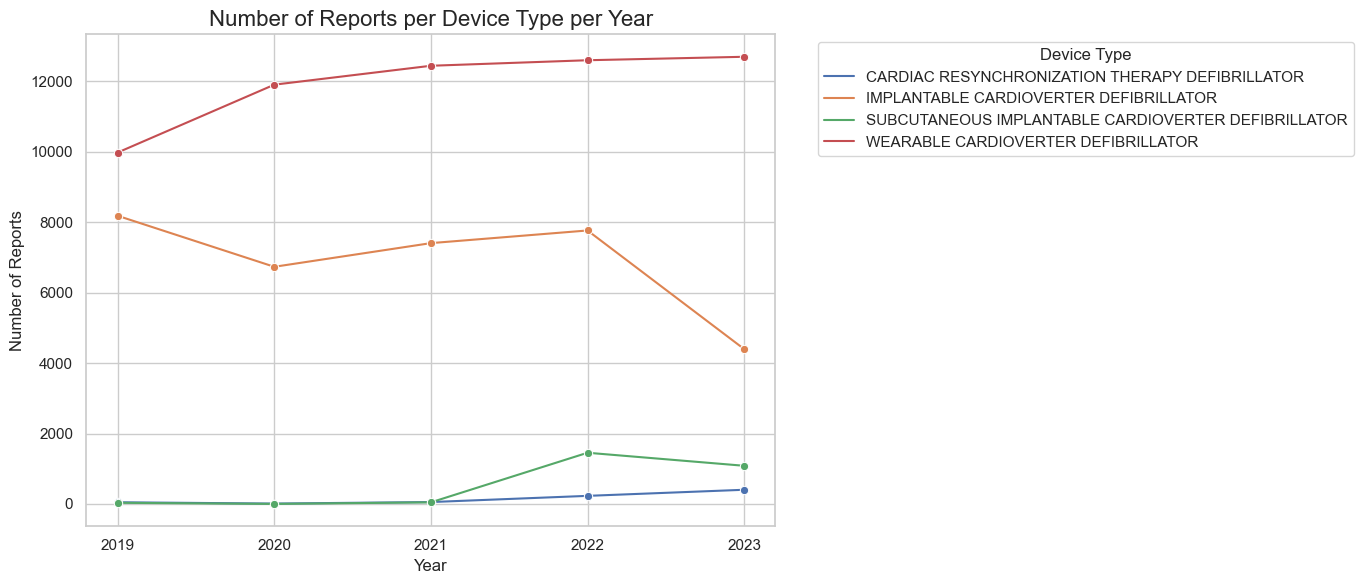

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Group by GENERIC_NAME and year
device_year_counts = df_defib_implant.groupby(["GENERIC_NAME", "year"]).size().reset_index(name="report_count")

# Convert year to integer if not already
device_year_counts["year"] = device_year_counts["year"].astype(int)

# Plot
plt.figure(figsize=(14, 6))
sns.set(style="whitegrid")

sns.lineplot(data=device_year_counts, x="year", y="report_count", hue="GENERIC_NAME", marker="o")

# Fix x-axis scale
plt.xticks(sorted(device_year_counts["year"].unique()))

# Labels and formatting
plt.title("Number of Reports per Device Type per Year", fontsize=16)
plt.xlabel("Year")
plt.ylabel("Number of Reports")
plt.legend(title="Device Type", bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()

plt.show()


In [ ]:
# Group and count number of reports
device_year_counts = df_defib_implant.groupby(["GENERIC_NAME", "year"]).size().reset_index(name="report_count")

# Convert 'year' to int if necessary
device_year_counts["year"] = device_year_counts["year"].astype(int)

# Create pivot table: rows = device types, columns = years
report_table = device_year_counts.pivot(index="GENERIC_NAME", columns="year", values="report_count").fillna(0).astype(int)

# Display the table
print(report_table)

# Optional: display nicely in Jupyter
import pandas as pd
from IPython.display import display
display(report_table)


year                                                2019   2020   2021   2022  \
GENERIC_NAME                                                                    
CARDIAC RESYNCHRONIZATION THERAPY DEFIBRILLATOR       48     11     54    230   
IMPLANTABLE CARDIOVERTER DEFIBRILLATOR              8181   6733   7405   7764   
SUBCUTANEOUS IMPLANTABLE CARDIOVERTER DEFIBRILL...    33      2     46   1454   
WEARABLE CARDIOVERTER DEFIBRILLATOR                 9977  11903  12440  12597   

year                                                 2023  
GENERIC_NAME                                               
CARDIAC RESYNCHRONIZATION THERAPY DEFIBRILLATOR       403  
IMPLANTABLE CARDIOVERTER DEFIBRILLATOR               4397  
SUBCUTANEOUS IMPLANTABLE CARDIOVERTER DEFIBRILL...   1084  
WEARABLE CARDIOVERTER DEFIBRILLATOR                 12695  


year,2019,2020,2021,2022,2023
GENERIC_NAME,,,,,
CARDIAC RESYNCHRONIZATION THERAPY DEFIBRILLATOR,48,11,54,230,403
IMPLANTABLE CARDIOVERTER DEFIBRILLATOR,8181,6733,7405,7764,4397
SUBCUTANEOUS IMPLANTABLE CARDIOVERTER DEFIBRILLATOR,33,2,46,1454,1084
WEARABLE CARDIOVERTER DEFIBRILLATOR,9977,11903,12440,12597,12695


In [ ]:
import pandas as pd

# Define the years and file paths
years = range(2019, 2024)  # From 2020 to 2024
file_template = "foitext{}.txt"  # File pattern

# List to store DataFrames
df_list = []

# Read each file, add a 'year' column, and append to list
for year in years:
    file_path = file_template.format(year)
    try:
        df = pd.read_csv(file_path, delimiter="|", dtype=str, encoding="latin1")
        df["year"] = year  # Add year column
        df_list.append(df)
        print(f"✅ {file_path} loaded successfully!")
    except Exception as e:
        print(f"❌ Error reading {file_path}:", e)

# Merge all DataFrames into one
if df_list:
    df_foitext_all = pd.concat(df_list, ignore_index=True)
    print("✅ All years merged successfully!")
else:
    df_foitext_all = None
    print("❌ No files were loaded.")

# Display first few rows
df_foitext_all.head()

✅ foitext2019.txt loaded successfully!
✅ foitext2020.txt loaded successfully!
✅ foitext2021.txt loaded successfully!
✅ foitext2022.txt loaded successfully!
✅ foitext2023.txt loaded successfully!
✅ All years merged successfully!


,MDR_REPORT_KEY,MDR_TEXT_KEY,TEXT_TYPE_CODE,PATIENT_SEQUENCE_NUMBER,DATE_REPORT,FOI_TEXT,year
0,7491296,107502815,N,1,NaN,"PUMP PASSED THE IDLE CURRENT MEASUREMENT TEST,...",2019
1,7491296,107502816,D,1,NaN,IT WAS REPORTED THAT THE CUSTOMER PASSED AWAY ...,2019
2,7811695,118401124,N,1,NaN,THE CORD WAS NOT RETURNED TO OLYMPUS FOR EVALU...,2019
3,7811695,118401125,D,1,NaN,OLYMPUS WAS INFORMED THAT DURING A CYSTOSCOPY ...,2019
4,7987287,124459474,N,1,NaN,(B)(4). CURRENTLY IT IS UNKNOWN WHETHER OR NOT...,2019


In [ ]:
df_foitext_all.dtypes

MDR_REPORT_KEY             object
MDR_TEXT_KEY               object
TEXT_TYPE_CODE             object
PATIENT_SEQUENCE_NUMBER    object
DATE_REPORT                object
FOI_TEXT                   object
year                        int64
dtype: object

In [ ]:
df_defib_implant.head()

,MDR_REPORT_KEY,DEVICE_EVENT_KEY,IMPLANT_FLAG,DATE_REMOVED_FLAG,DEVICE_SEQUENCE_NO,DATE_RECEIVED,BRAND_NAME,GENERIC_NAME,MANUFACTURER_D_NAME,MANUFACTURER_D_ADDRESS_1,...,DEVICE_AGE_TEXT,DEVICE_EVALUATED_BY_MANUFACTUR,COMBINATION_PRODUCT_FLAG,UDI-DI,UDI-PUBLIC,year,BRAND_NAME_CLEAN,GENERIC_NAME_CLEAN,MANUFACTURER_D_NAME_CLEAN,MANUFACTURER_D_ADDRESS_1_CLEAN
10,8207329,NaN,NaN,NaN,1,2019/01/01,UNIFY ASSURA ICD,IMPLANTABLE CARDIOVERTER DEFIBRILLATOR,"ST. JUDE MEDICAL, INC.",645 ALMANOR AVENUE,...,DA,Y,N,NaN,NaN,2019,unify assura icd,implantable cardioverter defibrillator,st jude medical inc,almanor avenue
81,8207400,NaN,NaN,NaN,1,2019/01/01,"UNIFY QUADRA CRT-D, US MODEL, DF4COMP",IMPLANTABLE CARDIOVERTER DEFIBRILLATOR,"ST. JUDE MEDICAL, INC.(CRM-SUNNYVALE)",645 ALMANOR AVENUE,...,NaN,R,N,05414734504546,05414734504546,2019,unify quadra crtd u model dfcomp,implantable cardioverter defibrillator,st jude medical inccrmsunnyvale,almanor avenue
91,8207410,NaN,NaN,NaN,1,2019/01/01,UNIFY ASSURA CRT-D RF HV,IMPLANTABLE CARDIOVERTER DEFIBRILLATOR,"ST. JUDE MEDICAL, INC.(CRM-SUNNYVALE)",645 ALMANOR AVENUE,...,DA,R,N,05414734508186,05414734508186,2019,unify assura crtd rf hv,implantable cardioverter defibrillator,st jude medical inccrmsunnyvale,almanor avenue
97,8207416,NaN,NaN,NaN,1,2019/01/01,QUADRA ASSURA CRT-D QUAD RF HV,IMPLANTABLE CARDIOVERTER DEFIBRILLATOR,"ST. JUDE MEDICAL, INC.(CRM-SYLMAR)",15900 VALLEY VIEW COURT,...,DA,Y,N,05414734508292,05414734508292,2019,quadra assura crtd quad rf hv,implantable cardioverter defibrillator,st jude medical inccrmsylmar,valley view court
100,8207419,NaN,NaN,NaN,1,2019/01/01,UNIFY ASSURA CRT-D RF HV,IMPLANTABLE CARDIOVERTER DEFIBRILLATOR,"ST. JUDE MEDICAL, INC.(CRM-SYLMAR)",15900 VALLEY VIEW COURT,...,NaN,R,N,05414734508216,05414734508216,2019,unify assura crtd rf hv,implantable cardioverter defibrillator,st jude medical inccrmsylmar,valley view court


In [ ]:
# ---- Proceed only if both data frames loaded ----
if df_defib_implant is not None and df_foitext_all is not None:
    print("\n=== df_device Overview ===")
    print(df_defib_implant.info())

    print("\n=== df_foitext Overview ===")
    print(df_foitext_all.info())

    # ---- Merge on MDR_REPORT_KEY ----
    # 'how' can be 'inner', 'left', 'right', or 'outer', depending on what you need.
    df_merged = pd.merge(df_defib_implant, df_foitext_all, on="MDR_REPORT_KEY", how="inner")

    print("\n✅ Merged DataFrame (df_merged) Info ===")
    print(df_merged.info())

    # Now df_merged contains columns from both dfs for matching MDR_REPORT_KEY rows.
    print("\n=== First Few Rows of Merged Data ===")
    print(df_merged.head())

    # Example usage: Check for missing values in merged data
    print("\n=== Missing Values in Merged Data ===")
    print(df_merged.isnull().sum())

    # Export df_merged to CSV if needed
    # df_merged.to_csv("data/merged_output.csv", index=False)

else:
    print("\n❌ Could not merge because one of the DataFrames failed to load.")


=== df_device Overview ===
<class 'pandas.core.frame.DataFrame'>
Index: 97457 entries, 10 to 10212607
Data columns (total 36 columns):
 #   Column                          Non-Null Count  Dtype 
---  ------                          --------------  ----- 
 0   MDR_REPORT_KEY                  97457 non-null  object
 1   DEVICE_EVENT_KEY                0 non-null      object
 2   IMPLANT_FLAG                    0 non-null      object
 3   DATE_REMOVED_FLAG               0 non-null      object
 4   DEVICE_SEQUENCE_NO              97457 non-null  object
 5   DATE_RECEIVED                   97457 non-null  object
 6   BRAND_NAME                      97382 non-null  object
 7   GENERIC_NAME                    97457 non-null  object
 8   MANUFACTURER_D_NAME             97445 non-null  object
 9   MANUFACTURER_D_ADDRESS_1        97425 non-null  object
 10  MANUFACTURER_D_ADDRESS_2        163 non-null    object
 11  MANUFACTURER_D_CITY             97424 non-null  object
 12  MANUFACTURER_D_STAT

MDR_REPORT_KEY                         0
DEVICE_EVENT_KEY                  209761
IMPLANT_FLAG                      209761
DATE_REMOVED_FLAG                 209761
DEVICE_SEQUENCE_NO                     0
DATE_RECEIVED                          0
BRAND_NAME                           154
GENERIC_NAME                           0
MANUFACTURER_D_NAME                   35
MANUFACTURER_D_ADDRESS_1              50
MANUFACTURER_D_ADDRESS_2          209274
MANUFACTURER_D_CITY                   51
MANUFACTURER_D_STATE_CODE          13378
MANUFACTURER_D_ZIP_CODE            13387
MANUFACTURER_D_ZIP_CODE_EXT       140825
MANUFACTURER_D_COUNTRY_CODE           51
MANUFACTURER_D_POSTAL_CODE         13387
DEVICE_OPERATOR                       87
EXPIRATION_DATE_OF_DEVICE         122779
MODEL_NUMBER                         115
CATALOG_NUMBER                     88733
LOT_NUMBER                        122676
OTHER_ID_NUMBER                   209761
DEVICE_AVAILABILITY                    0
DATE_RETURNED_TO

In [ ]:
print("\n=== Missing Values in Merged Data ===")
print(df_merged.isnull().sum())


=== Missing Values in Merged Data ===
MDR_REPORT_KEY                         0
DEVICE_EVENT_KEY                  209761
IMPLANT_FLAG                      209761
DATE_REMOVED_FLAG                 209761
DEVICE_SEQUENCE_NO                     0
DATE_RECEIVED                          0
BRAND_NAME                           154
GENERIC_NAME                           0
MANUFACTURER_D_NAME                   35
MANUFACTURER_D_ADDRESS_1              50
MANUFACTURER_D_ADDRESS_2          209274
MANUFACTURER_D_CITY                   51
MANUFACTURER_D_STATE_CODE          13378
MANUFACTURER_D_ZIP_CODE            13387
MANUFACTURER_D_ZIP_CODE_EXT       140825
MANUFACTURER_D_COUNTRY_CODE           51
MANUFACTURER_D_POSTAL_CODE         13387
DEVICE_OPERATOR                       87
EXPIRATION_DATE_OF_DEVICE         122779
MODEL_NUMBER                         115
CATALOG_NUMBER                     88733
LOT_NUMBER                        122676
OTHER_ID_NUMBER                   209761
DEVICE_AVAILABILIT

In [ ]:
# Save the full merged DataFrame to a CSV file
df_merged.to_csv(".csv", index=False)

print("✅ Full merged DataFrame saved as 'merged_defib_foitext_data.csv'")


✅ Full merged DataFrame saved as 'merged_defib_foitext_data.csv'


,MDR_REPORT_KEY,DEVICE_EVENT_KEY,DEVICE_SEQUENCE_NO,DATE_RECEIVED,BRAND_NAME,GENERIC_NAME,MANUFACTURER_D_NAME,MANUFACTURER_D_ADDRESS_1,MANUFACTURER_D_CITY,MANUFACTURER_D_ZIP_CODE,...,DEVICE_AVAILABILITY,DATE_RETURNED_TO_MANUFACTURER,DEVICE_REPORT_PRODUCT_CODE,DEVICE_AGE_TEXT,DEVICE_EVALUATED_BY_MANUFACTUR,year,BRAND_NAME_CLEAN,GENERIC_NAME_CLEAN,MANUFACTURER_D_NAME_CLEAN,MANUFACTURER_D_ADDRESS_1_CLEAN
0,8207329,NaN,1,2019/01/01,UNIFY ASSURA ICD,IMPLANTABLE CARDIOVERTER DEFIBRILLATOR,"ST. JUDE MEDICAL, INC.",645 ALMANOR AVENUE,SUNNYVALE,94085,...,R,2018/12/26,NIK,DA,Y,2019,unify assura icd,implantable cardioverter defibrillator,st jude medical inc,almanor avenue
1,8207400,NaN,1,2019/01/01,"UNIFY QUADRA CRT-D, US MODEL, DF4COMP",IMPLANTABLE CARDIOVERTER DEFIBRILLATOR,"ST. JUDE MEDICAL, INC.(CRM-SUNNYVALE)",645 ALMANOR AVENUE,SUNNYVALE,94085,...,N,NaN,NIK,NaN,R,2019,unify quadra crtd u model dfcomp,implantable cardioverter defibrillator,st jude medical inccrmsunnyvale,almanor avenue
2,8207410,NaN,1,2019/01/01,UNIFY ASSURA CRT-D RF HV,IMPLANTABLE CARDIOVERTER DEFIBRILLATOR,"ST. JUDE MEDICAL, INC.(CRM-SUNNYVALE)",645 ALMANOR AVENUE,SUNNYVALE,94085,...,N,NaN,NIK,DA,R,2019,unify assura crtd rf hv,implantable cardioverter defibrillator,st jude medical inccrmsunnyvale,almanor avenue
3,8207416,NaN,1,2019/01/01,QUADRA ASSURA CRT-D QUAD RF HV,IMPLANTABLE CARDIOVERTER DEFIBRILLATOR,"ST. JUDE MEDICAL, INC.(CRM-SYLMAR)",15900 VALLEY VIEW COURT,SYLMAR,91342,...,R,2018/12/27,NIK,DA,Y,2019,quadra assura crtd quad rf hv,implantable cardioverter defibrillator,st jude medical inccrmsylmar,valley view court
4,8207419,NaN,1,2019/01/01,UNIFY ASSURA CRT-D RF HV,IMPLANTABLE CARDIOVERTER DEFIBRILLATOR,"ST. JUDE MEDICAL, INC.(CRM-SYLMAR)",15900 VALLEY VIEW COURT,SYLMAR,91342,...,N,NaN,NIK,NaN,R,2019,unify assura crtd rf hv,implantable cardioverter defibrillator,st jude medical inccrmsylmar,valley view court


In [ ]:
df

(97457, 24)

In [ ]:
df["DEVICE_AVAILABILITY"].value_counts()

DEVICE_AVAILABILITY
R    41367
N    29567
*    24180
Y     2343
Name: count, dtype: int64

In [ ]:
df["DEVICE_EVALUATED_BY_MANUFACTUR"].value_counts()

DEVICE_EVALUATED_BY_MANUFACTUR
Y    39967
R    32589
*    19717
N       87
I       22
Name: count, dtype: int64

In [ ]:
# Count the number of reports per device genre per year
df_trend = df.groupby(["GENERIC_NAME", "year"]).size().reset_index(name="count")

# Display the first few rows
df_trend.head(15)

,GENERIC_NAME,year,count
0,CARDIAC RESYNCHRONIZATION THERAPY DEFIBRILLATOR,2019,48
1,CARDIAC RESYNCHRONIZATION THERAPY DEFIBRILLATOR,2020,11
2,CARDIAC RESYNCHRONIZATION THERAPY DEFIBRILLATOR,2021,54
3,CARDIAC RESYNCHRONIZATION THERAPY DEFIBRILLATOR,2022,230
4,CARDIAC RESYNCHRONIZATION THERAPY DEFIBRILLATOR,2023,403
5,IMPLANTABLE CARDIOVERTER DEFIBRILLATOR,2019,8181
6,IMPLANTABLE CARDIOVERTER DEFIBRILLATOR,2020,6733
7,IMPLANTABLE CARDIOVERTER DEFIBRILLATOR,2021,7405
8,IMPLANTABLE CARDIOVERTER DEFIBRILLATOR,2022,7764
9,IMPLANTABLE CARDIOVERTER DEFIBRILLATOR,2023,4397


C:\Users\vivek\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\vivek\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\vivek\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
C:\Users\vivek\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length

<Axes: xlabel='year', ylabel='count'>

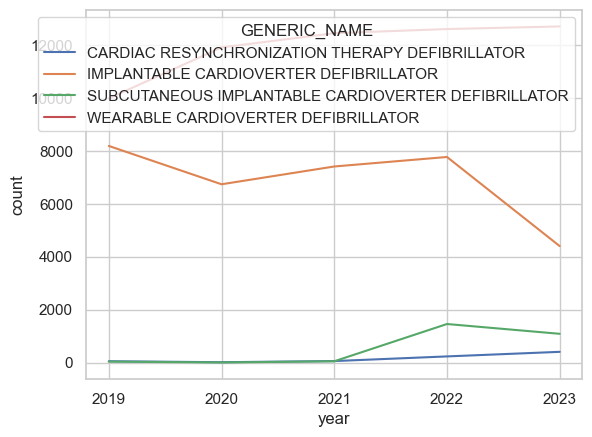

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.lineplot(data=df_trend, x="year", y="count", hue="GENERIC_NAME")

In [ ]:
# Device Returned (binary)
df["DEVICE_RETURNED_FLAG"] = df["DEVICE_AVAILABILITY"].map(lambda x: 1 if x == "R" else 0)

# Device Evaluated (binary)
df["DEVICE_EVALUATED_FLAG"] = df["DEVICE_EVALUATED_BY_MANUFACTUR"].map(lambda x: 1 if x in ["Y", "R"] else 0)


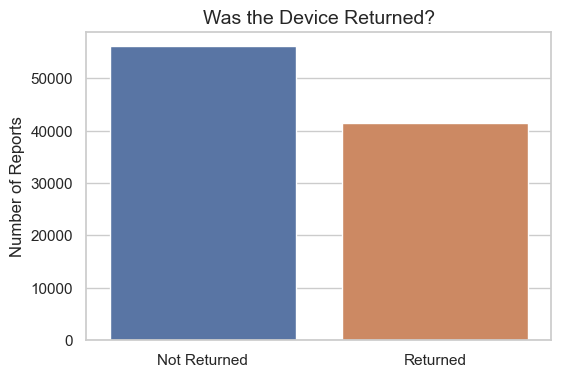

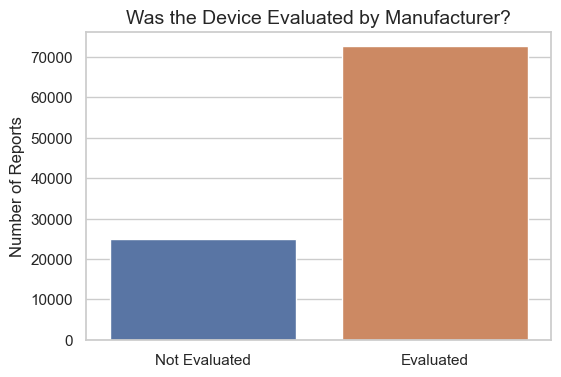

C:\Users\vivek\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\vivek\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\vivek\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
C:\Users\vivek\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length

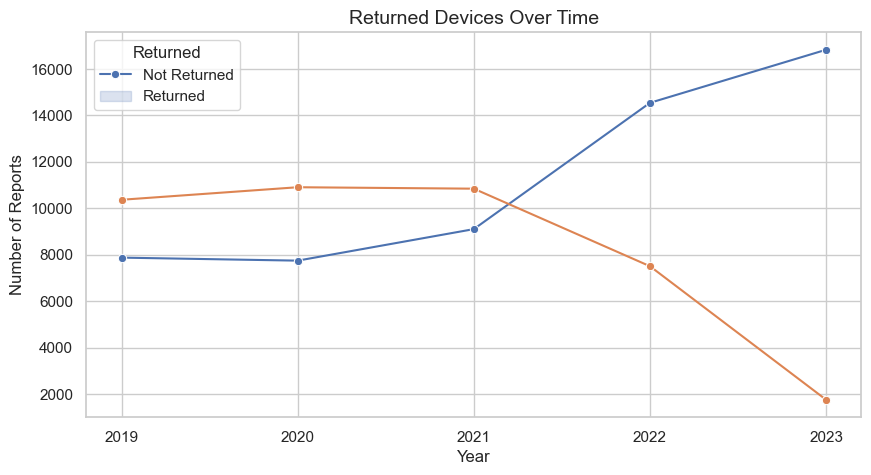

C:\Users\vivek\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\vivek\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\vivek\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
C:\Users\vivek\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length

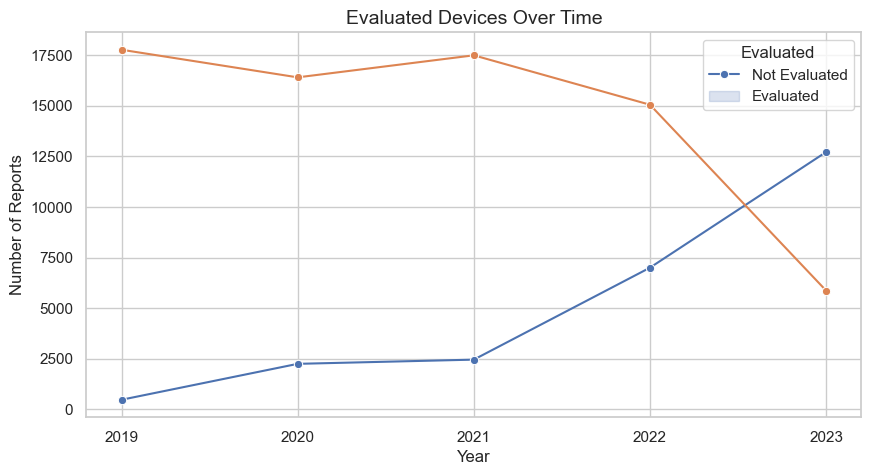

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.set(style="whitegrid")

# === 1. Bar Plot: Overall Device Returned Flag ===
plt.figure(figsize=(6, 4))
sns.countplot(x="DEVICE_RETURNED_FLAG", data=df)
plt.title("Was the Device Returned?", fontsize=14)
plt.xticks([0, 1], ["Not Returned", "Returned"])
plt.xlabel("")
plt.ylabel("Number of Reports")
plt.show()

# === 2. Bar Plot: Overall Device Evaluated Flag ===
plt.figure(figsize=(6, 4))
sns.countplot(x="DEVICE_EVALUATED_FLAG", data=df)
plt.title("Was the Device Evaluated by Manufacturer?", fontsize=14)
plt.xticks([0, 1], ["Not Evaluated", "Evaluated"])
plt.xlabel("")
plt.ylabel("Number of Reports")
plt.show()

# === 3. Time Trend: Device Returned Flag Over Years ===
returned_by_year = df.groupby(["year", "DEVICE_RETURNED_FLAG"]).size().reset_index(name="count")

plt.figure(figsize=(10, 5))
sns.lineplot(data=returned_by_year, x="year", y="count", hue="DEVICE_RETURNED_FLAG", marker="o")
plt.title("Returned Devices Over Time", fontsize=14)
plt.xlabel("Year")
plt.ylabel("Number of Reports")
plt.legend(title="Returned", labels=["Not Returned", "Returned"])
plt.show()

# === 4. Time Trend: Device Evaluated Flag Over Years ===
evaluated_by_year = df.groupby(["year", "DEVICE_EVALUATED_FLAG"]).size().reset_index(name="count")

plt.figure(figsize=(10, 5))
sns.lineplot(data=evaluated_by_year, x="year", y="count", hue="DEVICE_EVALUATED_FLAG", marker="o")
plt.title("Evaluated Devices Over Time", fontsize=14)
plt.xlabel("Year")
plt.ylabel("Number of Reports")
plt.legend(title="Evaluated", labels=["Not Evaluated", "Evaluated"])
plt.show()


In [ ]:
print(df.columns)

Index(['MDR_REPORT_KEY', 'DEVICE_EVENT_KEY', 'DEVICE_SEQUENCE_NO',
       'DATE_RECEIVED', 'BRAND_NAME', 'GENERIC_NAME', 'MANUFACTURER_D_NAME',
       'MANUFACTURER_D_ADDRESS_1', 'MANUFACTURER_D_CITY',
       'MANUFACTURER_D_ZIP_CODE', 'MANUFACTURER_D_COUNTRY_CODE',
       'DEVICE_OPERATOR', 'MODEL_NUMBER', 'CATALOG_NUMBER',
       'DEVICE_AVAILABILITY', 'DATE_RETURNED_TO_MANUFACTURER',
       'DEVICE_REPORT_PRODUCT_CODE', 'DEVICE_AGE_TEXT',
       'DEVICE_EVALUATED_BY_MANUFACTUR', 'year', 'BRAND_NAME_CLEAN',
       'GENERIC_NAME_CLEAN', 'MANUFACTURER_D_NAME_CLEAN',
       'MANUFACTURER_D_ADDRESS_1_CLEAN', 'DEVICE_RETURNED_FLAG',
       'DEVICE_EVALUATED_FLAG'],
      dtype='object')


## Summary of Defibrillator Device-Related Adverse Event Analysis (2019-2023)

This document summarizes the analysis of adverse event reports related to implantable and wearable defibrillators, as reported to the FDA's MAUDE database between 2019 and 2023.

### 1. Data Loading and Merging

*   **Device Data:** Annual data files (`DEVICE2019.txt` through `DEVICE2023.txt`) were loaded and merged into a single DataFrame (`df_device_all`). This dataset contains detailed information about each reported medical device.
*   **Text Data:** Corresponding text files (`foitext2019.txt` through `foitext2023.txt`) containing narrative descriptions of the adverse events were also loaded and merged (`df_foitext_all`).
*   **Combined Dataset:** The two datasets were merged on the `MDR_REPORT_KEY`, creating a comprehensive dataset (`df_merged`) with **209,761** records.

### 2. Data Filtering and Cleaning

*   **Device Filtering:** The initial dataset was filtered to include only reports related to specific types of defibrillators, resulting in a focused dataset of **97,457** records. The following `GENERIC_NAME` categories were included:
    *   `IMPLANTABLE CARDIOVERTER DEFIBRILLATOR`
    *   `WEARABLE CARDIOVERTER DEFIBRILLATOR`
    *   `SUBCUTANEOUS IMPLANTABLE CARDIOVERTER DEFIBRILLATOR`
    *   `CARDIAC RESYNCHRONIZATION THERAPY DEFIBRILLATOR`
*   **Text Cleaning:** Key text-based columns (`BRAND_NAME`, `GENERIC_NAME`, `MANUFACTURER_D_NAME`, `MANUFACTURER_D_ADDRESS_1`) were cleaned by:
    *   Converting text to lowercase.
    *   Removing punctuation and numbers.
    *   Normalizing whitespace.
    *   Removing common English stopwords.
    *   Applying lemmatization to reduce words to their root form.

### 3. Key Statistics and Trends

#### Device-Specific Report Trends (2019-2023)

The number of adverse event reports varied significantly across different defibrillator types and over the years:

| GENERIC_NAME                                      | 2019 | 2020  | 2021  | 2022   | 2023   |
| ------------------------------------------------- | ---- | ----- | ----- | ------ | ------ |
| **CARDIAC RESYNCHRONIZATION THERAPY DEFIBRILLATOR** | 48   | 11    | 54    | 230    | 403    |
| **IMPLANTABLE CARDIOVERTER DEFIBRILLATOR**          | 8181 | 6733  | 7405  | 7764   | 4397   |
| **SUBCUTANEOUS IMPLANTABLE CARDIOVERTER DEFIBRILLATOR** | 33   | 2     | 46    | 1454   | 1084   |
| **WEARABLE CARDIOVERTER DEFIBRILLATOR**             | 9977 | 11903 | 12440 | 12597  | 12695  |

*   **Wearable Cardioverter Defibrillators** consistently had the highest number of reports, showing a steady increase over the five-year period.
*   Reports for **Implantable Cardioverter Defibrillators** remained high but showed a notable decrease in 2023.
*   **Subcutaneous and Cardiac Resynchronization Therapy Defibrillators** saw a significant increase in reports, particularly in 2022 and 2023.

#### Device Availability and Evaluation

To simplify analysis, two binary flags were created:

*   `DEVICE_RETURNED_FLAG`: `1` if the device was returned to the manufacturer (`R`), `0` otherwise.
*   `DEVICE_EVALUATED_FLAG`: `1` if evaluated by the manufacturer (`Y` or `R`), `0` otherwise.

**Overall Counts:**

*   **Devices Returned:** **41,367** reports indicated the device was returned.
*   **Devices Evaluated:** **72,556** reports indicated the device was evaluated by the manufacturer.

**Trends Over Time:**

*   The number of **returned devices** showed a slight downward trend over the years.
*   The number of **evaluated devices** remained relatively stable, with a slight dip in 2023, mirroring the overall trend in reports.

This summary provides a comprehensive overview of the data and initial findings, which can serve as a strong foundation for a more in-depth research paper.

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Display the yearly trend graph
plt.figure(figsize=(14, 6))
sns.set(style="whitegrid")
sns.lineplot(data=device_year_counts, x="year", y="report_count", hue="GENERIC_NAME", marker="o")
plt.xticks(sorted(device_year_counts["year"].unique()))
plt.title("Number of Reports per Device Type per Year", fontsize=16)
plt.xlabel("Year")
plt.ylabel("Number of Reports")
plt.legend(title="Device Type", bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.savefig("yearly_trend_counts.png")
plt.show()

# Display the pivot table
print("\nReport Counts per Device Type and Year:")
display(report_table)

# Calculate and display the percentage trends
df_trend_pct = df_trend.groupby("year").apply(lambda x: x.assign(percentage=x["count"] / x["count"].sum() * 100)).reset_index(drop=True)

plt.figure(figsize=(14, 6))
sns.lineplot(data=df_trend_pct, x="year", y="percentage", hue="GENERIC_NAME", marker="o")
plt.title("Percentage of Reports per Device Type per Year", fontsize=16)
plt.xlabel("Year")
plt.ylabel("Percentage of Reports")
plt.legend(title="Device Type", bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.savefig("yearly_trend_percentages.png")
plt.show()

NameError: name 'device_year_counts' is not defined

<Figure size 1400x600 with 0 Axes>

## Exploratory Data Analysis (EDA) Summary

### Data Loading and Preparation

1.  **Device Data:**
    *   Loaded and merged annual device data from 2019 to 2023.
    *   The combined dataset (`df_device_all`) contains detailed information about each medical device report.

2.  **Text Data:**
    *   Loaded and merged corresponding text data files containing narrative descriptions of adverse events.
    *   This created the `df_foitext_all` DataFrame.

3.  **Filtering for Defibrillators:**
    *   The `df_device_all` DataFrame was initially filtered to include only reports where the `GENERIC_NAME` contained "defibrillator."
    *   A second, more specific filter was applied to include only the following device types:
        *   `IMPLANTABLE CARDIOVERTER DEFIBRILLATOR`
        *   `WEARABLE CARDIOVERTER DEFIBRILLATOR`
        *   `SUBCUTANEOUS IMPLANTABLE CARDIOVERTER DEFIBRILLATOR`
        *   `CARDIAC RESYNCHRONIZATION THERAPY DEFIBRILLATOR`
    *   This resulted in the `df_defib_implant` DataFrame, which was used for the analysis.

4.  **Text Cleaning:**
    *   A text cleaning function was applied to key columns (`BRAND_NAME`, `GENERIC_NAME`, `MANUFACTURER_D_NAME`, `MANUFACTURER_D_ADDRESS_1`) to standardize the text by:
        *   Converting to lowercase.
        *   Removing punctuation and numbers.
        *   Normalizing whitespace.
        *   Removing stopwords.
        *   Applying lemmatization.

### Key Findings

1.  **Yearly Trends in Adverse Event Reports:**
    *   **Wearable Cardioverter Defibrillators** show a consistent and significant upward trend in the number of adverse event reports from 2019 to 2023.
    *   **Implantable Cardioverter Defibrillators** have the second-highest number of reports, but the trend has been more volatile, with a notable decrease in 2023.
    *   **Subcutaneous and Cardiac Resynchronization Therapy Defibrillators** have a lower number of reports overall, but both show a significant increase in recent years, particularly in 2022 and 2023.

2.  **Report Counts by Device Type:**
    *   The analysis of report counts per device type provides a clear picture of the volume of adverse events associated with each category.
    *   The pivot table and line charts clearly illustrate the dominance of wearable and implantable defibrillators in the dataset.

3.  **Percentage Trends:**
    *   The percentage trend analysis shows the relative proportion of reports for each device type over the years.
    *   This provides a different perspective on the data, highlighting how the distribution of reports has shifted over time.

This EDA provides a solid foundation for more advanced analysis, such as topic modeling and sentiment analysis, which can provide deeper insights into the nature of the reported adverse events.

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

data = {
    "GENERIC_NAME": [
        "CARDIAC RESYNCHRONIZATION THERAPY DEFIBRILLATOR",
        "IMPLANTABLE CARDIOVERTER DEFIBRILLATOR",
        "SUBCUTANEOUS IMPLANTABLE CARDIOVERTER DEFIBRILLATOR",
        "WEARABLE CARDIOVERTER DEFIBRILLATOR",
    ],
    2019: [48, 8181, 33, 9977],
    2020: [11, 6733, 2, 11903],
    2021: [54, 7405, 46, 12440],
    2022: [230, 7764, 1454, 12597],
    2023: [403, 4397, 1084, 12695],
}

df_graph = pd.DataFrame(data)
df_graph = df_graph.set_index("GENERIC_NAME").T
df_graph.index = df_graph.index.astype(int)

plt.figure(figsize=(14, 6))
sns.set(style="whitegrid")
sns.lineplot(data=df_graph, dashes=False, markers=True)
plt.title("Number of Reports per Device Type per Year", fontsize=16)
plt.xlabel("Year")
plt.ylabel("Number of Reports")
plt.legend(title="Device Type", bbox_to_anchor=(1.05, 1), loc='upper left')
plt.xticks(df_graph.index)
plt.tight_layout()
plt.show()